In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [2]:
db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "12345678",
                             database = "target_db")


cur = db.cursor()



# Q1. List all unique cities where customers are located?

In [3]:
query = """select distinct(customer_city) from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Q2. Count the number of orders placed in 2017?

In [4]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cur.execute(query)

data = cur.fetchall()

"Total orders pleacd in 2017 are",data[0][0]



('Total orders pleacd in 2017 are', 135303)

# 3. Find the total sales per category?


In [5]:
query = """SELECT UCASE(product_category), ROUND(SUM(payment_value),2) AS total_sale
FROM products
JOIN order_items
ON order_items.product_id = products.product_id
JOIN payments
ON payments.order_id = order_items.order_id
GROUP BY product_category
ORDER BY total_sale DESC"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Category", "Sales"])

df

,Category,Sales
0,BED TABLE BATH,1712553.67
1,HEALTH BEAUTY,1657373.12
2,COMPUTER ACCESSORIES,1585330.45
3,FURNITURE DECORATION,1430176.39
4,WATCHES PRESENT,1429216.68
...,...,...
69,PC GAMER,2174.43
70,HOUSE COMFORT 2,1710.54
71,CDS MUSIC DVDS,1199.43
72,FASHION CHILDREN'S CLOTHING,785.67


# 4. Calculate the percentage of orders that were paid in installments?

In [6]:
query = """SELECT CONCAT((SUM(CASE 
				WHEN payment_installments >= 1 THEN 1 
				ELSE 0
			End)/ COUNT(*) * 100),'%') AS orders_installments_
FROM payments;"""

cur.execute(query)

data = cur.fetchall()

data

[('99.9981%',)]

# 5. Count the number of customers from each state.

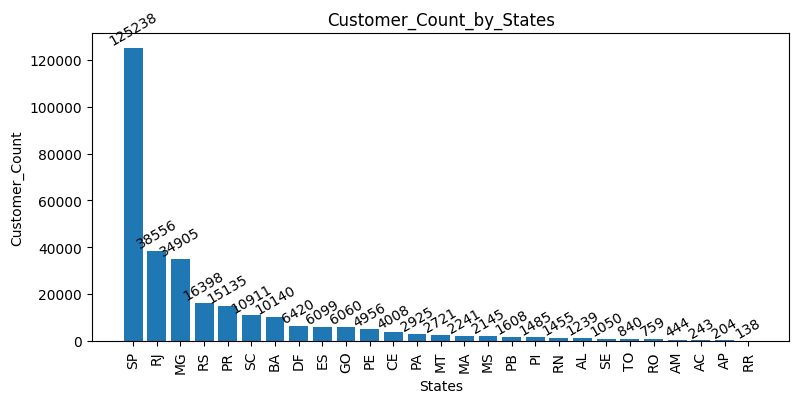

In [7]:
query = """SELECT customer_state, COUNT(customer_id)
FROM customers
GROUP BY customer_state;"""

cur.execute(query)

data = cur.fetchall()

df= pd.DataFrame(data, columns=["Customer_State" , "Total_Customer"])

df = df.sort_values(by= "Total_Customer", ascending= False)
plt.figure(figsize= (9,4))
bar = plt.bar(df["Customer_State"], df["Total_Customer"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Customer_Count")
plt.title("Customer_Count_by_States")
plt.bar_label(bar,labels=df["Total_Customer"], rotation = 30)
plt.show()

# 6. Calculate the number of orders per month in 2018?

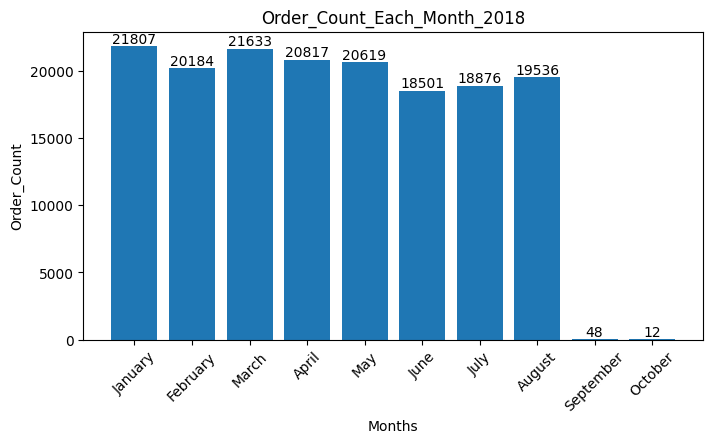

In [8]:
query = """SELECT MONTHNAME(order_purchase_timestamp) AS Month_2018, COUNT(order_id) AS Total_Order
FROM orders
WHERE YEAR(orders.order_purchase_timestamp) = 2018
GROUP BY MONTH(order_purchase_timestamp), Month_2018
ORDER BY MONTH(order_purchase_timestamp);"""

cur.execute(query)

data = cur.fetchall()

df= pd.DataFrame(data, columns=["Month_2018" , "Total_Order"])
plt.figure(figsize= (8,4))
bar = plt.bar(df["Month_2018"], df["Total_Order"])
plt.xticks(rotation = 45)
plt.xlabel("Months")
plt.ylabel("Order_Count")
plt.title("Order_Count_Each_Month_2018")
plt.bar_label(bar,labels=df["Total_Order"])
plt.show()

# 7. Find the average number of products per order, grouped by customer city?

In [9]:
query = """WITH
count_per_order
AS
(SELECT orders.order_id, orders.customer_id,COUNT(order_items.order_id) as oc
FROM orders
JOIN order_items
ON orders.order_id = order_items.order_id
GROUP BY order_id, customer_id)
SELECT customers.customer_city, ROUND(AVG(count_per_order.oc),2) AS avg_orders
FROM customers
JOIN count_per_order
ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city
ORDER BY avg_orders DESC;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Customers States" , "Avg Products Per Orders"])

df.head(10)

,Customers States,Avg Products Per Orders
0,padre carvalho,21.00
1,celso ramos,19.50
2,datas,18.00
3,candido godoi,18.00
4,matias olimpio,15.00
5,cidelandia,12.00
6,curralinho,12.00
7,picarra,12.00
8,morro de sao paulo,12.00
9,teixeira soares,12.00


# Q8. Calculate the percentage of total revenue contributed by each product category?

In [10]:
query = """SELECT 
    UCASE(product_category) AS category,
    ROUND((SUM(payment_value) / (SELECT 
                    SUM(payment_value)
                FROM
                    payments) * 100),
            2) AS sale_contribution
FROM
    products
        JOIN
    order_items ON order_items.product_id = products.product_id
        JOIN
    payments ON payments.order_id = order_items.order_id
GROUP BY product_category
ORDER BY sale_contribution DESC;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Product Category" , "Sales Contribution"])

df

,Product Category,Sales Contribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Q9. Identify the correlation between product price and the number of times a product has been purchased?

In [11]:
query = """SELECT 
    UCASE(product_category),
    COUNT(order_items.product_id) AS product_pruchased,
    ROUND(AVG(order_items.price), 2) AS avg_price
FROM
    products
        JOIN
    order_items ON order_items.product_id = products.product_id
GROUP BY product_category
ORDER BY avg_price DESC;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Product Category" ,"Product Purchased" ,"Avg price Each Procduct"])

arr1 = df["Product Purchased"]
arr2 = df["Avg price Each Procduct"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Q10. Calculate the total revenue generated by each seller, and rank them by revenue?

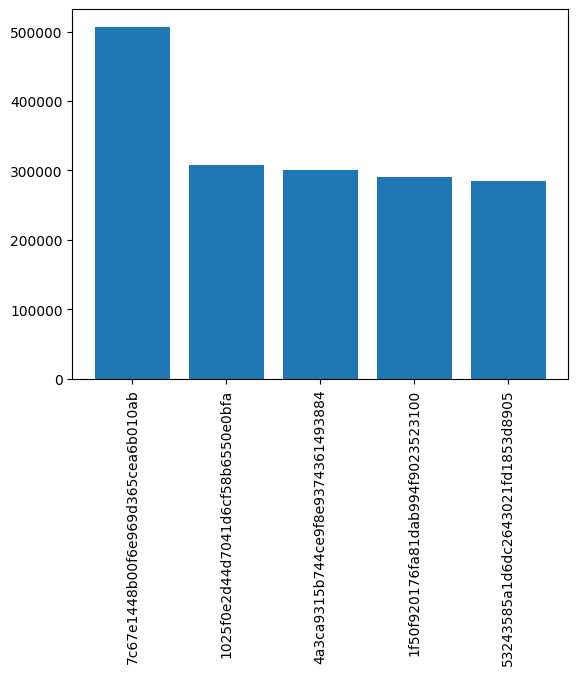

In [12]:
query = """SELECT 
		        RANK() OVER(ORDER BY total_sales DESC) AS RNK, 
                sellers, 
                total_sales
            FROM
	            (SELECT order_items.seller_id AS sellers, 
			            ROUND(SUM(payments.payment_value),2) AS total_sales
		            FROM order_items
		            JOIN 
			            payments 
				            ON order_items.order_id = payments.order_id
		            GROUP BY order_items.seller_id) AS a;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["RNK" ,"Seller" ,"Sales"])
df = df.head()

plt.bar(df["Seller"] , df["Sales"])
plt.xticks(rotation = 90)
plt.show()

# Q11. Calculate the moving average of order values for each customer over their order history?

In [13]:
query = """SELECT 
		customer_id, 
        order_purchase_timestamp, 
        payment, 
        AVG(payment) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp
		ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
FROM
			(SELECT 
					orders.customer_id, 
                    orders.order_purchase_timestamp, 
                    payments.payment_value AS payment
			FROM payments JOIN orders
			ON payments.order_id = orders.order_id) AS a;;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Customer ID" ,"Order Time","Payment" ,"Moving Average"])

df

,Customer ID,Order Time,Payment,Moving Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
311653,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311654,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311655,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
311656,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Q12. Calculate the cumulative sales per month for each year?

In [14]:
query = """SELECT years, 
	   months,
	   sales AS monthly_sales, 
	   ROUND(SUM(sales) OVER(ORDER BY years, months),2) AS cumulative_sales
FROM
		(SELECT 
				YEAR(order_purchase_timestamp) AS years, 
				MONTH(order_purchase_timestamp) AS months, 
				ROUND(SUM(payment_value),2) AS sales
		FROM orders JOIN payments
					ON orders.order_id = payments.order_id
		GROUP BY  
				 YEAR(order_purchase_timestamp), 
				 MONTH(order_purchase_timestamp)
		ORDER BY 
				YEAR(order_purchase_timestamp), 
				MONTH(order_purchase_timestamp)) AS A;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Year","Months" ,"Monthly Sales","Cumulative Sales"])

df

,Year,Months,Monthly Sales,Cumulative Sales
0,2016,9,756.72,756.72
1,2016,10,177271.44,178028.16
2,2016,12,58.86,178087.02
3,2017,1,415464.12,593551.14
4,2017,2,875724.03,1469275.17
5,2017,3,1349590.80,2818865.97
6,2017,4,1253364.09,4072230.06
7,2017,5,1778756.46,5850986.52
8,2017,6,1533829.14,7384815.66
9,2017,7,1777148.76,9161964.42


# Q13. Calculate the year-over-year growth rate of total sales?

In [15]:
query = """With yearly_sales
as
	(SELECT 
			YEAR(order_purchase_timestamp) AS years, 
            ROUND(SUM(payment_value),2) AS revenue
	FROM orders JOIN payments
			ON orders.order_id = payments.order_id
	GROUP BY years
	ORDER BY years)

SELECT 	years,
		revenue, 
        IFNULL(LAG(revenue) OVER(ORDER BY years),'-') AS previous_year, 
        CONCAT(IFNULL(ROUND((revenue - LAG(revenue) OVER (ORDER BY years))
				/ LAG(revenue) OVER(ORDER BY years) * 100,2),0),'%') AS yoy_growth_percentage
FROM yearly_sales;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Years","Revenue" ,"Previous Year","YOY Growth Percentage"])

df

,Years,Revenue,Previous Year,YOY Growth Percentage
0,2016,178087.02,-,0%
1,2017,21749240.18,178087.02,12112.7%
2,2018,26099289.16,21749240.18,20%


# Q14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase?

In [16]:
query = """WITH first_purchase AS (
    
    SELECT 
        customer_id, 
        MIN(order_purchase_timestamp) AS first_purchase_date
    FROM 
        orders
    GROUP BY 
        customer_id
),
retained_customers AS (
    
    SELECT 
        f.customer_id,
        CASE 
            WHEN COUNT(o.order_id) > 1 THEN 1  
            ELSE 0
        END AS is_retained
    FROM 
        first_purchase f
    LEFT JOIN 
        orders o 
    ON 
        f.customer_id = o.customer_id
        AND o.order_purchase_timestamp > f.first_purchase_date
        AND o.order_purchase_timestamp <= DATE_ADD(f.first_purchase_date, INTERVAL 6 MONTH)
    GROUP BY 
        f.customer_id
)

SELECT 
    COUNT(CASE WHEN is_retained = 1 THEN 1 END) AS retained_customers,
    COUNT(*) AS total_customers,
    ROUND(COUNT(CASE WHEN is_retained = 1 THEN 1 END) * 100.0 / COUNT(*), 2) AS retention_rate_percentage
FROM 
    retained_customers;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Retained_Customers" ,"Total Customers","Retention Rate Percentage"])

df

,Retained_Customers,Total Customers,Retention Rate Percentage
0,0,99441,0.00


# Q15. Identify the top 3 customers who spent the most money in each year?

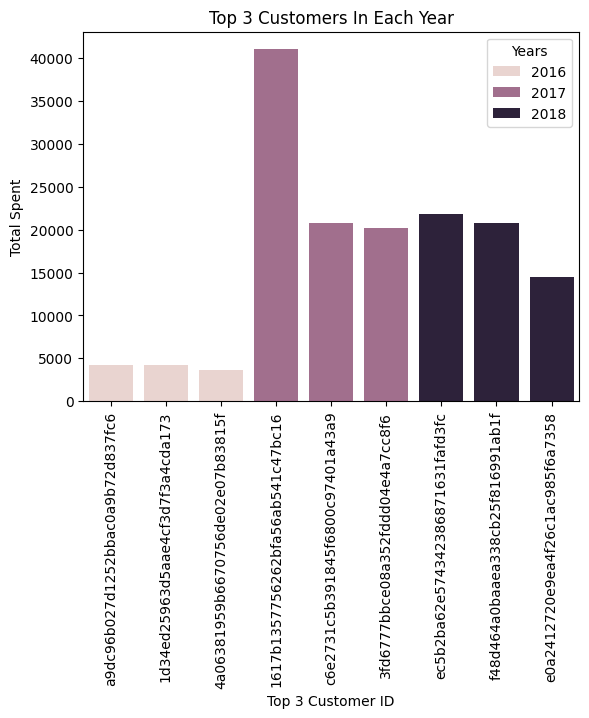

In [17]:
query = """WITH a 
AS
(SELECT 
		RANK() OVER(PARTITION BY year ORDER BY total_spent DESC) AS RNK,
		year,
        customer_id,
        total_spent
FROM
		(SELECT 
				YEAR(orders.order_purchase_timestamp) AS year, 
				orders.customer_id, 
				ROUND(SUM(payments.payment_value),2) AS total_spent
		FROM orders JOIN payments
					ON orders.order_id = payments.order_id
		GROUP BY year, orders.customer_id
		ORDER BY year, total_spent DESC) AS a
)
SELECT year,
        customer_id,
        total_spent
FROM a
WHERE RNK < 4;"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns= ["Years","Top 3 Customer ID" ,"Total Spent"])

sns.barplot(x = "Top 3 Customer ID", y = "Total Spent", data = df, hue = "Years")
plt.xticks(rotation = 90)
plt.title("Top 3 Customers In Each Year")
plt.show()